In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# data = pd.read_excel("/path/to/your/excel/file.xlsx")
# dataset_folder_name = "00055_4params_baseline_ORBextractor_nFeatures_initThFAST_minThFAST"
dataset_path_str = "GA/GAtests/00060_4params_baseline_ORBextractor_nFeatures_initThFAST_minThFAST"
analysis_folder = "Analysis"
data = pd.read_csv( dataset_path_str + "/results.csv")
# data = data[:932]
index_to_drop = data[data.apply(lambda row: all(cell == '*' for cell in row), axis=1)].index[0]

# Drop that row and all rows after it
data = data.iloc[:index_to_drop]
print(data.tail(1))


    Generation                    Solution             Fitness  \
929         29  "111110111001010011110100"  1.5136719942092896   

                      Parameters     Fittest  
929  (119.0, 1312.0, 45.0, 15.0)  Population  


In [88]:
data['Generation'] = data['Generation'].astype(int)
data['Fitness'] = data['Fitness'].astype(float)

# Remove known outliers given that their value is 999
data_cleaned = data[data['Fitness'] != 999]

# remove any outlliers
# # Identifying outliers based on Fitness using the IQR method
# Q1_raw = data_cleaned['Fitness'].quantile(0.25)
# Q3_raw = data_cleaned['Fitness'].quantile(0.75)
# IQR_raw = Q3_raw - Q1_raw
# outliers_raw = data_cleaned[(data_cleaned['Fitness'] < (Q1_raw - 1.5 * IQR_raw)) | 
#                             (data_cleaned['Fitness'] > (Q3_raw + 1.5 * IQR_raw))]

# # Removing the outliers from the raw data
# data_without_outliers = data_cleaned.drop(outliers_raw.index)

# # Recalculating best fit, average fitness, and worst fitness for each generation without the outliers
# generation_stats_without_outliers = data_without_outliers.groupby('Generation').agg({'Fitness': ['min', 'mean', 'max']})

# # Rename columns for clarity
# generation_stats_without_outliers.columns = ['Best Fit', 'Average Fit', 'Worst Fit']

# Identify and remove outliers using the IQR method
# Q1 = data['Fitness'].quantile(0.2)
# Q3 = data['Fitness'].quantile(0.8)
# IQR = Q3 - Q1

# # Define bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# # Print the bounds
# print(f"Lower Bound for 'Fitness': {lower_bound}")
# print(f"Upper Bound for 'Fitness': {upper_bound}")

# # Filter out the known outlier value 999
# filtered_data = data[data['Fitness'] != 999]

# # Find the minimum and maximum values
# min_fitness = filtered_data['Fitness'].min()
# max_fitness = filtered_data['Fitness'].max()
# # Print the minimum and maximum values of the 'Fitness' column
# print(f"Minimum 'Fitness' value in the entire dataset: {min_fitness}")
# print(f"Maximum 'Fitness' value in the entire dataset: {max_fitness}")

# # Filter outliers
# data_cleaned = data[(data['Fitness'] >= lower_bound) & (data['Fitness'] <= upper_bound)]



# Calculate best fit, average fitness, and worst fitness for each generation
generation_stats = data_cleaned.groupby('Generation').agg({'Fitness': ['min', 'mean', 'max']})
generation_stats.columns = ['Best Fit', 'Average Fit', 'Worst Fit']


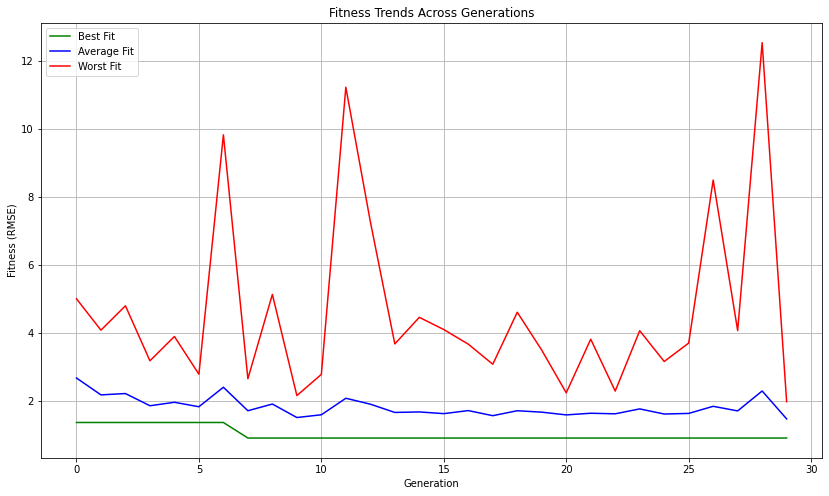

In [89]:

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(generation_stats.index, generation_stats['Best Fit'], label='Best Fit', color='green')
plt.plot(generation_stats.index, generation_stats['Average Fit'], label='Average Fit', color='blue')
plt.plot(generation_stats.index, generation_stats['Worst Fit'], label='Worst Fit', color='red')
plt.xlabel('Generation')
plt.ylabel('Fitness (RMSE)')
plt.title('Fitness Trends Across Generations')
plt.legend()
plt.grid(True)
# plt.patch.set_facecolor('cyan')
graph_file = dataset_path_str.split('/')[2].split('_')[0] + "_bestfit_avgfit_worsefit.png"
# print(analysis_folder + "/" + dataset_path_str.split('/')[0] + "/" + graph_file)
plt.savefig(dataset_path_str.split('/')[0] + "/" + analysis_folder + "/" + graph_file)
plt.show()